# Phân tích dữ liệu tên trẻ em Hoa Kỳ (1880–2010)
**Phần 13.3 – US Baby Names 1880–2010**
|

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Thiết lập hiển thị
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (10,5)



## Bước 1: Đọc dữ liệu mẫu năm 1880 và kiểm tra nhanh
Đọc file `yob1880.txt` để kiểm tra cấu trúc (cột: `name, sex, births`).
Tính tổng số trẻ sinh theo giới tính
Vì mỗi tệp chỉ chứa tên có ít nhất 5 trẻ sinh, ta có thể tính tổng số trẻ sinh của từng giới trong năm:


In [6]:
sample_path = 'yob1880.txt'
if not os.path.exists(sample_path):
    print(f'Không tìm thấy {sample_path}. Vui lòng kiểm tra thư mục dữ liệu.')
else:
    names1880 = pd.read_csv(sample_path, names=['name','sex','births'], encoding='utf-8')
    display(names1880.head(10))
    print('\nTổng số bản ghi:', len(names1880))
    print('\nTổng số trẻ theo giới:')
    print(names1880.groupby('sex')['births'].sum())

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288



Tổng số bản ghi: 2000

Tổng số trẻ theo giới:
sex
F     90993
M    110493
Name: births, dtype: int64


## Bước 2: Hợp nhất dữ liệu các năm 1880–2010
Vòng lặp sẽ đọc các file `yob1880.txt` tới `yob2010.txt`, thêm cột `year` và ghép lại.

In [7]:
pieces = []
missed = []
for year in range(1880, 2011):
    path = f'yob{year}.txt'
    if os.path.exists(path):
        frame = pd.read_csv(path, names=['name','sex','births'], encoding='utf-8')
        frame['year'] = year
        pieces.append(frame)
    else:
        missed.append(path)

if missed:
    print('Một vài file thiếu (không tồn tại):')
    for p in missed[:10]:
        print(' -', p)
    print('\nNếu các file bị thiếu, hãy đặt đầy đủ các file yob1880.txt..yob2010.txt vào datasets/babynames/')
else:
    names = pd.concat(pieces, ignore_index=True)
    print('Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép:', len(names))
    display(names.head())
    display(names.tail())

Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép: 1690784


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


## Bước 3: Tổng số trẻ sinh theo năm và giới tính
Sử dụng `pivot_table` để tính tổng số births theo `year` và `sex`.

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


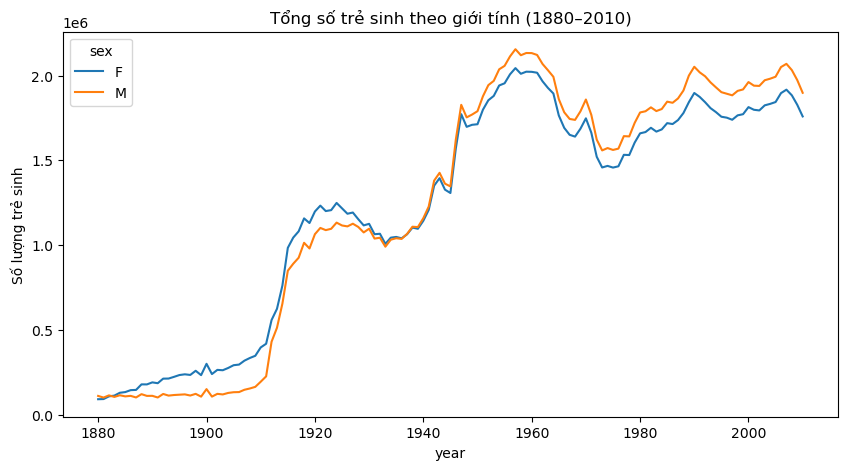

In [17]:

total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
display(total_births.tail())
total_births.plot(title='Tổng số trẻ sinh theo giới tính (1880–2010)')
plt.ylabel('Số lượng trẻ sinh')
plt.show()


Biểu đồ cho thấy:

Số trẻ sinh tăng mạnh từ cuối thế kỷ 19 đến giữa thế kỷ 20.

Tỷ lệ bé trai luôn cao hơn bé gái, nhưng xu hướng biến động tương đồng qua thời gian.

## Bước 4: Tính tỷ lệ của mỗi tên trong năm (cột `prop`)
Thêm cột `prop` = births / tổng births (theo từng nhóm year, sex).

In [21]:
def add_prop(group):
    births = group['births'].astype(float)
    group = group.copy()
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)
display(names.head())


C:\Users\HP\AppData\Local\Temp\ipykernel_13664\1685216722.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)


,name,sex,births,year,prop,last_letter
0,Mary,F,7065,1880,0.077643,y
1,Anna,F,2604,1880,0.028618,a
2,Emma,F,2003,1880,0.022013,a
3,Elizabeth,F,1939,1880,0.021309,h
4,Minnie,F,1746,1880,0.019188,e


prop = số trẻ sinh với tên đó / tổng số trẻ sinh của giới tính đó trong năm.

Ví dụ: nếu 7.000 bé gái tên “Mary” trong tổng 90.000 bé gái năm 1880, thì prop ≈ 0.077.

In [22]:
s = names.groupby(['year','sex'])['prop'].sum()
print('Kiểm tra tổng prop (mỗi nhóm year,sex):')
display(s.head(6))

Kiểm tra tổng prop (mỗi nhóm year,sex):


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
Name: prop, dtype: float64

## Bước 5: Lấy Top 1000 tên mỗi năm (theo mỗi giới)
Lọc ra tập top1000 để phân tích nhanh và trực quan hóa.

In [24]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False).head(1000)

grouped = names.groupby(['year','sex'])

top1000 = grouped.apply(get_top1000)
top1000.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_13664\2828741946.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop last_letter
year sex                                                     
1880 F   0       Mary   F    7065  1880  0.077643           y
         1       Anna   F    2604  1880  0.028618           a
         2       Emma   F    2003  1880  0.022013           a
         3  Elizabeth   F    1939  1880  0.021309           h
         4     Minnie   F    1746  1880  0.019188           e

In [26]:
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop,last_letter
0,Mary,F,7065,1880,0.077643,y
1,Anna,F,2604,1880,0.028618,a
2,Emma,F,2003,1880,0.022013,a
3,Elizabeth,F,1939,1880,0.021309,h
4,Minnie,F,1746,1880,0.019188,e


## Bước 6: Xu hướng tên cụ thể
Lấy dữ liệu của vài tên nổi tiếng để xem xu hướng phổ biến theo thời gian:
Ví dụ: vẽ xu hướng cho các tên 'John', 'Harry', 'Mary', 'Marilyn'.

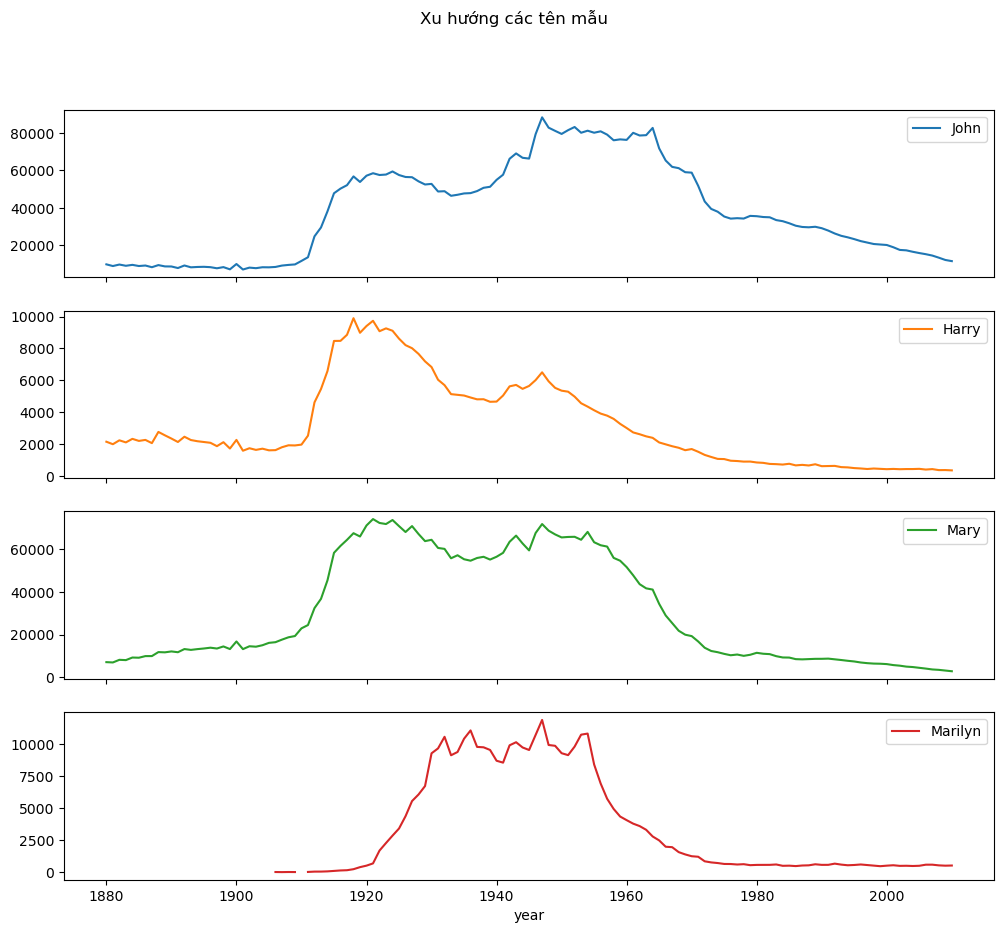

In [29]:
boys = top1000[top1000.sex == "M"]
girls = top1000[top1000.sex == "F"]
total_births_names = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
subset = ['John','Harry','Mary','Marilyn']
exist = [n for n in subset if n in total_births_names.columns]
total_births_names[exist].plot(subplots=True, figsize=(12,10), title='Xu hướng các tên mẫu')
plt.show()


Biểu đồ cho thấy:
“Mary” cực kỳ phổ biến đầu thế kỷ 20 nhưng giảm mạnh sau 1960.
“John” giữ vị trí cao trong thời gian dài.
“Marilyn” tăng vọt giữa thế kỷ (do ảnh hưởng của Marilyn Monroe).

## Bước 7: Tỷ lệ tổng của Top 1000 tên theo thời gian
Xem Top1000 chiếm bao nhiêu phần trăm tổng số tên mỗi năm (tăng/giảm đa dạng).

sex,F,M
year,,
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256
2010,0.736780,0.843156


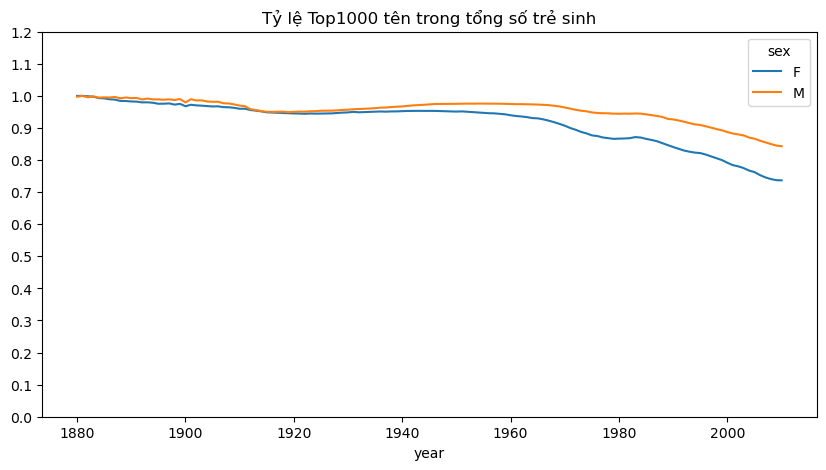

In [31]:

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
display(table.tail())
table.plot(title='Tỷ lệ Top1000 tên trong tổng số trẻ sinh',yticks=np.linspace(0, 1.2, 13))
plt.show()


Quan sát:

Cuối thế kỷ 19, Top 1000 chiếm hơn 90% tổng số tên.

Ngày nay, chỉ chiếm khoảng 70% → cho thấy tên ngày càng đa dạng.

In [32]:
df = boys[boys["year"] == 2010]
df 

,name,sex,births,year,prop,last_letter
260877,Jacob,M,21875,2010,0.011523,b
260878,Ethan,M,17866,2010,0.009411,n
260879,Michael,M,17133,2010,0.009025,l
260880,Jayden,M,17030,2010,0.008971,n
260881,William,M,16870,2010,0.008887,m
...,...,...,...,...,...,...
261872,Jaydan,M,194,2010,0.000102,n
261873,Camilo,M,194,2010,0.000102,o
261874,Bailey,M,194,2010,0.000102,y
261875,Destin,M,194,2010,0.000102,n


In [33]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [34]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

In [35]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

Vì mảng được lập chỉ mục từ 0, nên việc cộng 1 vào kết quả này sẽ cho bạn kết quả là 117. Ngược lại, vào năm 1900, con số này nhỏ hơn nhiều:

## Bước 9: Đo độ đa dạng - số lượng tên chiếm 50% tổng
Tính số tên cần thiết để đạt 50% tổng births mỗi năm và vẽ biểu đồ.

C:\Users\HP\AppData\Local\Temp\ipykernel_13664\2222545723.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')


sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


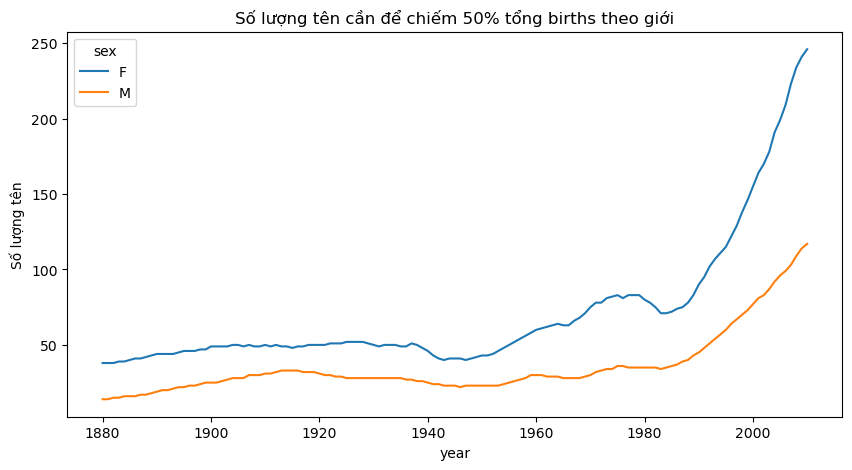

In [37]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')
display(diversity.tail())
diversity.plot(title='Số lượng tên cần để chiếm 50% tổng births theo giới')
plt.ylabel('Số lượng tên')
plt.show()

Nhận xét :Tên con gái luôn đa dạng hơn tên con trai, và chúng càng trở nên đa dạng hơn theo thời gian.

## Bước 10 Phân tích sâu mở rộng


Lấy chữ cái cuối của mỗi tên và tạo bảng tổng hợp số trẻ sinh theo chữ cái cuối, giới tính và năm để phân tích xu hướng thay đổi qua thời gian.

In [38]:
def get_last_letter(x):
    return x[-1]
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
table = names.pivot_table("births", index=last_letters,
columns=["sex", "year"], aggfunc=sum)


C:\Users\HP\AppData\Local\Temp\ipykernel_13664\2145031199.py:5: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters,


Chọn ba năm đại diện cho toàn bộ lịch sử và in ra một vài hàng đầu tiên:

In [39]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Tiếp theo, chuẩn hóa bảng theo tổng số ca sinh để tính toán một bảng mới chứa
tỷ lệ tổng số ca sinh cho mỗi giới tính kết thúc trong mỗi chữ cái:

In [40]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [41]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

Sau khi đã có tỷ lệ các chữ cái cuối, ta sẽ tạo biểu đồ cột cho từng giới tính, thể hiện sự thay đổi tỷ lệ các chữ cái cuối qua các năm.

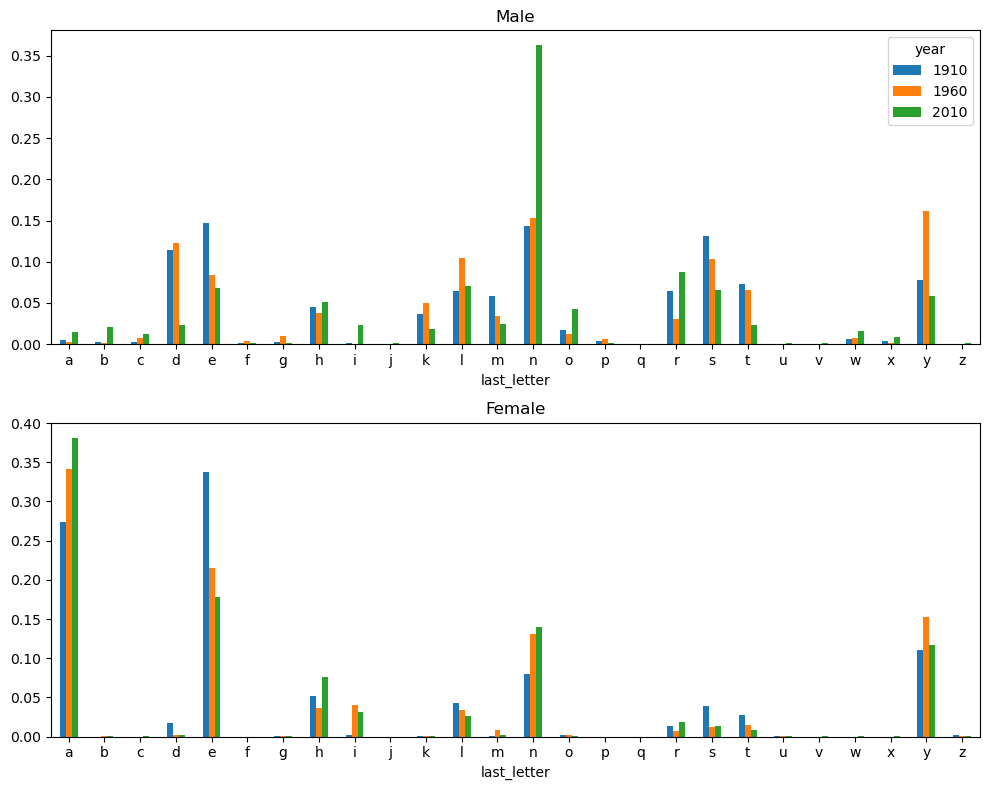

In [52]:

# Vẽ 2 biểu đồ cột (Male / Female) chỉ cho 3 năm này
import matplotlib.pyplot as plt
plt.close('all')  # dọn vùng vẽ cũ
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Lưu ý: letter_prop["M"] và letter_prop["F"] là DataFrame có các cột là [1910,1960,2010]
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

plt.tight_layout()
plt.show()


Tên con trai kết thúc bằng n đã có sự tăng trưởng đáng kể kể từ những năm 1960. Quay lại bảng đầy đủ đã tạo trước đó, tôi lại chuẩn hóa theo năm và
giới tính, rồi chọn một tập hợp con các chữ cái cho tên con trai, cuối cùng chuyển vị để biến mỗi
cột thành một chuỗi thời gian:


In [66]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


Với DataFrame chuỗi thời gian này,có thể vẽ lại biểu đồ xu hướng theo thời gian
một lần nữa bằng phương pháp vẽ biểu đồ

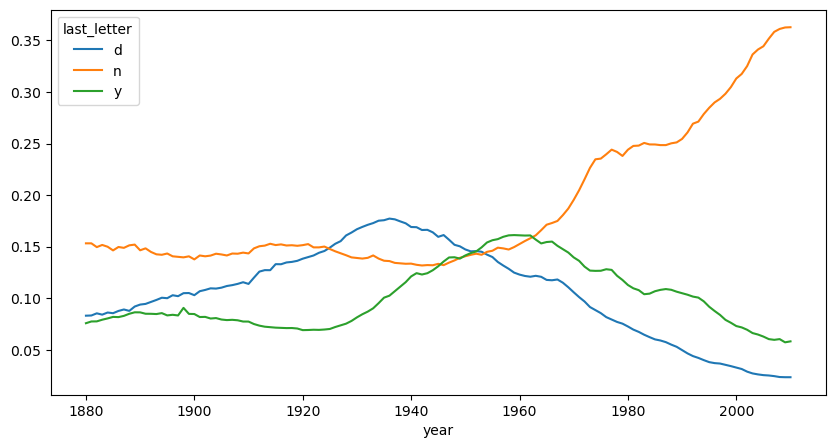

In [ ]:

import matplotlib.pyplot as plt

fig = dny_ts.plot()  
plt.show()           


## Bước 11: Boy names that became girl names (and vice versa)

Một xu hướng thú vị khác là xem xét những cái tên phổ biến hơn với một giới tính
trước đó trong mẫu nhưng đã trở nên được ưa chuộng hơn khi dùng làm tên cho giới tính còn lại
theo thời gian. Một ví dụ là tên Lesley hoặc Leslie. Quay lại với DataFrame top1000, tôi tính toán một danh sách các tên xuất hiện trong tập dữ liệu bắt đầu bằng "Lesl":

In [71]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

645     Leslie
2325    Lesley
4241    Leslee
4706     Lesli
6082     Lesly
dtype: object

Từ đó, chúng ta có thể lọc xuống chỉ còn những tên đó và cộng các ca sinh được nhóm theo tên
để xem tần suất tương đối:

In [73]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       916
Lesley     35010
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

Tiếp theo, chúng ta hãy tổng hợp theo giới tính và năm, và chuẩn hóa trong năm:

In [74]:
table = filtered.pivot_table("births", index="year",columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Cuối cùng, bây giờ có thể tạo ra một biểu đồ phân tích sự cố theo giới tính theo thời gian

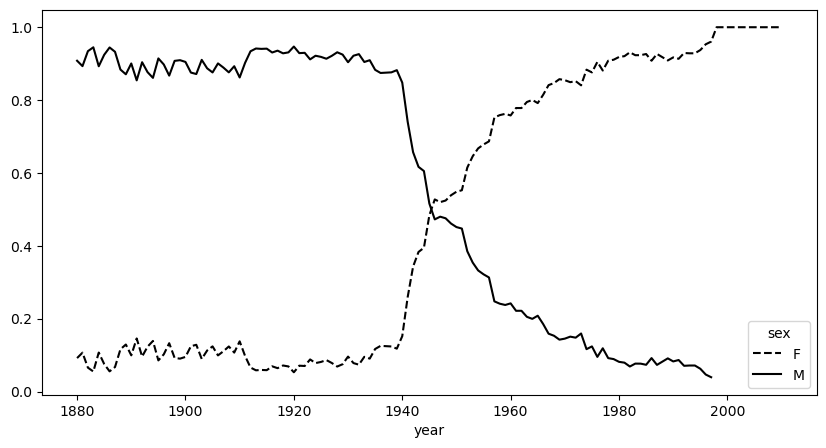

In [ ]:

import matplotlib.pyplot as plt

fig = table.plot(style={"M": "k-", "F": "k--"})
plt.show()          
